### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
### Dataset:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. I decided to proceed to an undersampling strategy to re-balance the class.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

### Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data:

In [2]:
data = pd.read_csv("CreditCard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      7300 non-null   float64
 1   V2      7300 non-null   float64
 2   V3      7300 non-null   float64
 3   V4      7300 non-null   float64
 4   V5      7300 non-null   float64
 5   V6      7300 non-null   float64
 6   V7      7300 non-null   float64
 7   V8      7300 non-null   float64
 8   V9      7300 non-null   float64
 9   V10     7300 non-null   float64
 10  V11     7300 non-null   float64
 11  V12     7300 non-null   float64
 12  V13     7300 non-null   float64
 13  V14     7300 non-null   float64
 14  V15     7300 non-null   float64
 15  V16     7300 non-null   float64
 16  V17     7300 non-null   float64
 17  V18     7300 non-null   float64
 18  V19     7300 non-null   float64
 19  V20     7300 non-null   float64
 20  V21     7300 non-null   float64
 21  V22     7300 non-null   float64
 22  

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,-0.193825,0.159880,-0.278411,0.193200,-0.128358,-0.048911,-0.202722,0.029468,-0.099865,-0.219260,...,0.033059,-0.003541,0.004062,-0.001630,-0.001130,0.011666,0.009332,0.005830,90.372956,0.041096
std,2.521772,1.970007,2.488454,1.746604,1.826802,1.371383,2.175403,1.764826,1.307587,1.863682,...,1.071380,0.778235,0.654663,0.597398,0.531629,0.484641,0.464333,0.330659,289.206749,0.198526
min,-31.972536,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,-0.995027,-0.550039,-1.029977,-0.796602,-0.737594,-0.801558,-0.602338,-0.199438,-0.708590,-0.580755,...,-0.232682,-0.543785,-0.165239,-0.356176,-0.320517,-0.317820,-0.070511,-0.054776,5.000000,0.000000
50%,-0.081147,0.103165,0.112765,0.050026,-0.056608,-0.300839,0.031776,0.033797,-0.086823,-0.100473,...,-0.020227,0.007343,-0.012333,0.038141,0.013887,-0.035643,0.006109,0.012170,21.855000,0.000000
75%,1.291141,0.884756,1.012824,0.871857,0.616391,0.380007,0.558040,0.352100,0.583610,0.412193,...,0.200228,0.528939,0.146370,0.428241,0.351934,0.270810,0.106617,0.083614,76.000000,0.000000
max,2.446505,22.057729,3.757300,12.132323,12.791416,21.190194,26.249717,20.007208,8.141560,12.901627,...,27.202839,8.316275,13.218751,3.437028,3.590787,3.116200,5.058448,15.124103,12910.930000,1.000000


### Check missing values:

In [28]:
data.isnull().sum().sum()

0

### Plot correlations:

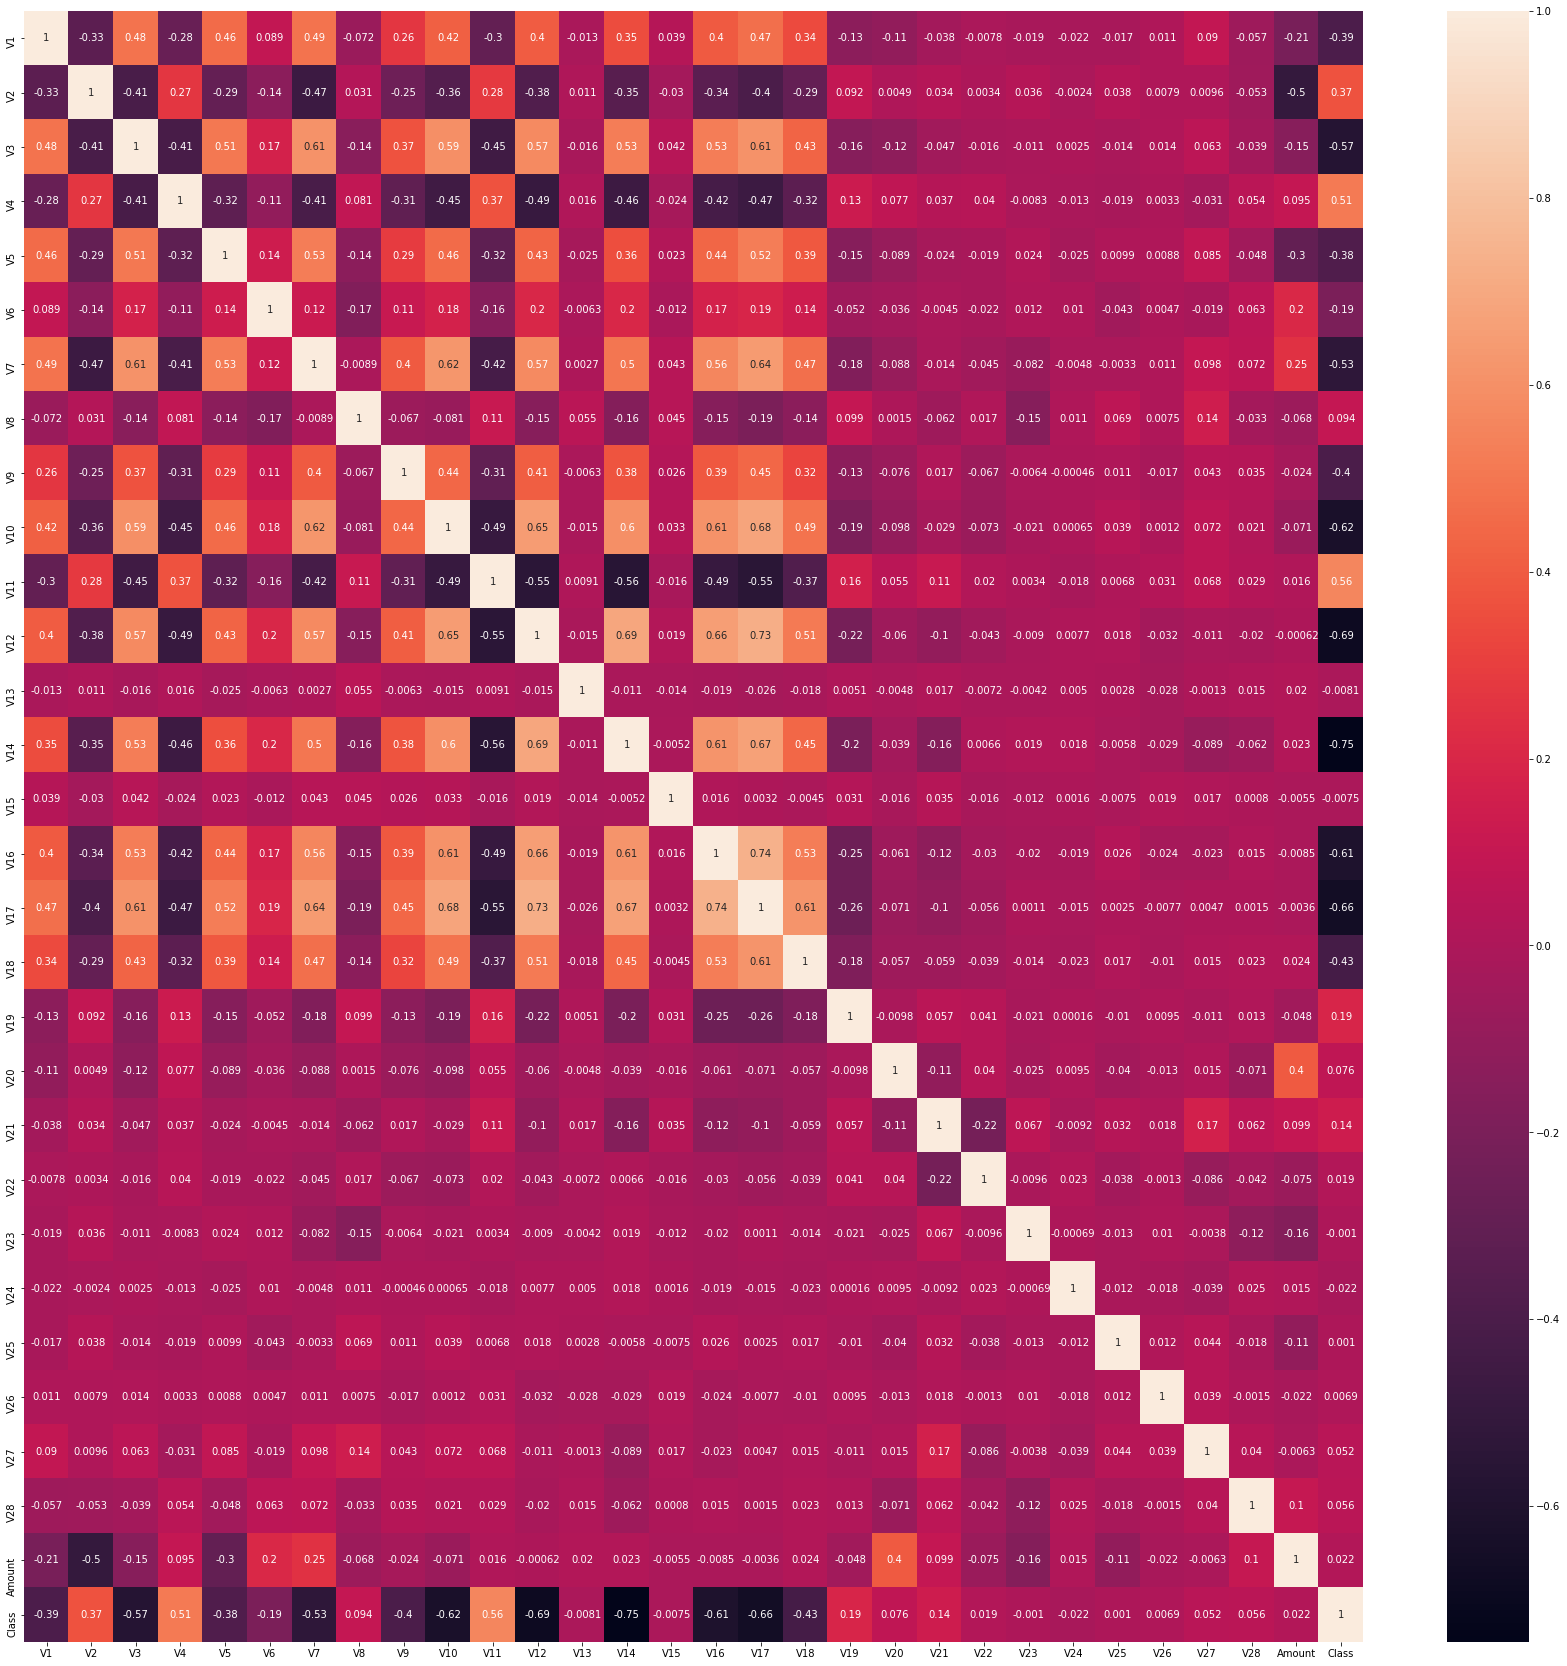

In [7]:
f, ax = plt.subplots(figsize=(30, 30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix , annot=True , ax=ax)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

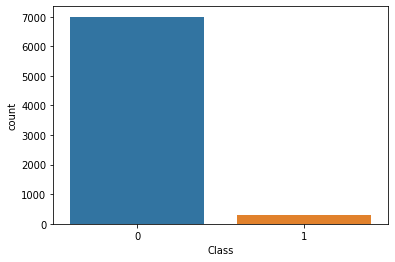

In [8]:
# let's have a look at the class
sns.countplot(x="Class", data=data)

The dataset is highly imbalanced ! It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to random undersampling.

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.


#### How undersampling works :
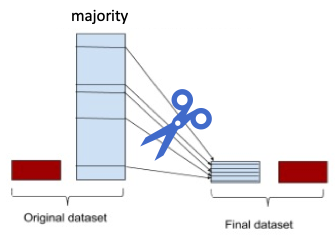

#### How oversampling work:
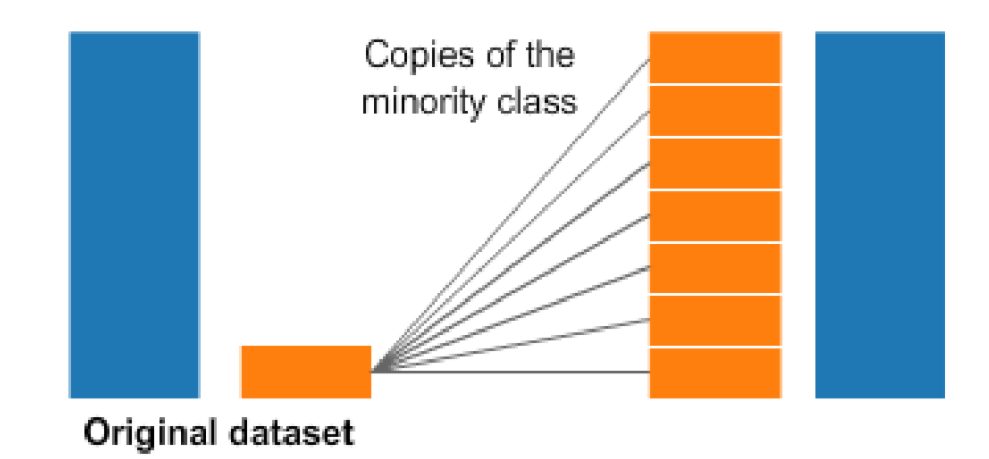

#### To undersample, we can use the resample method from sklearn.utils!


In [9]:
target_1 = data[data["Class"]==1]

In [10]:
target_0 = data[data["Class"]==0]

In [11]:
from sklearn.utils import resample

In [12]:
# Downsample majority and combine with minority
fraud_downsampled = resample(target_0, replace = False,  n_samples = len(target_1), random_state = 123)
downsampled = pd.concat([fraud_downsampled, target_1])

<AxesSubplot:xlabel='Class', ylabel='count'>

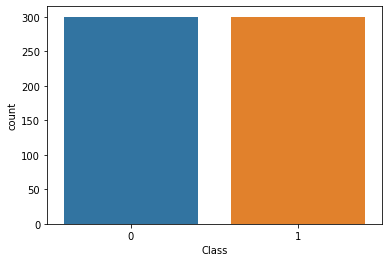

In [13]:
sns.countplot(x="Class", data=downsampled)

### Split Data into Train and Test:

In [14]:
X = downsampled.drop("Class",axis=1).values
y = downsampled["Class"].values

In [15]:
# Create the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Classification methods commonly used for fraud detection:

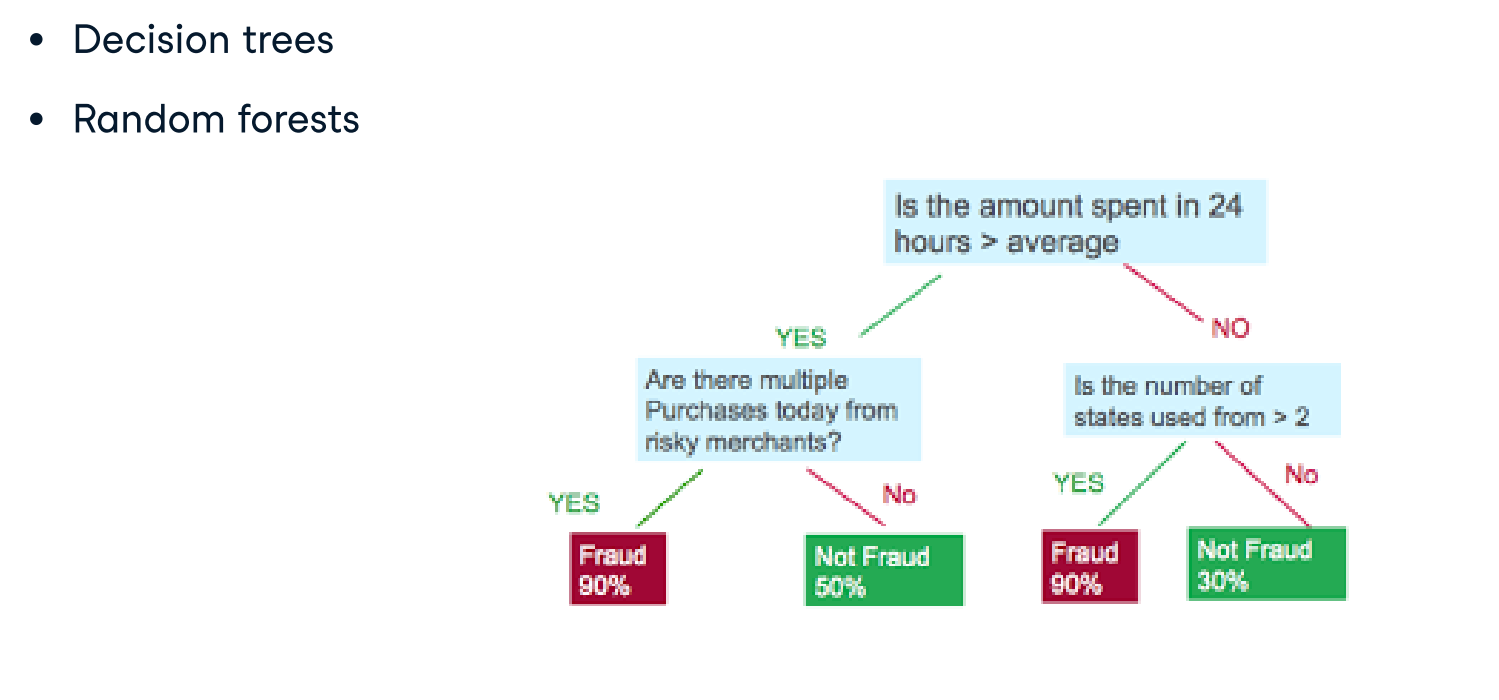

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

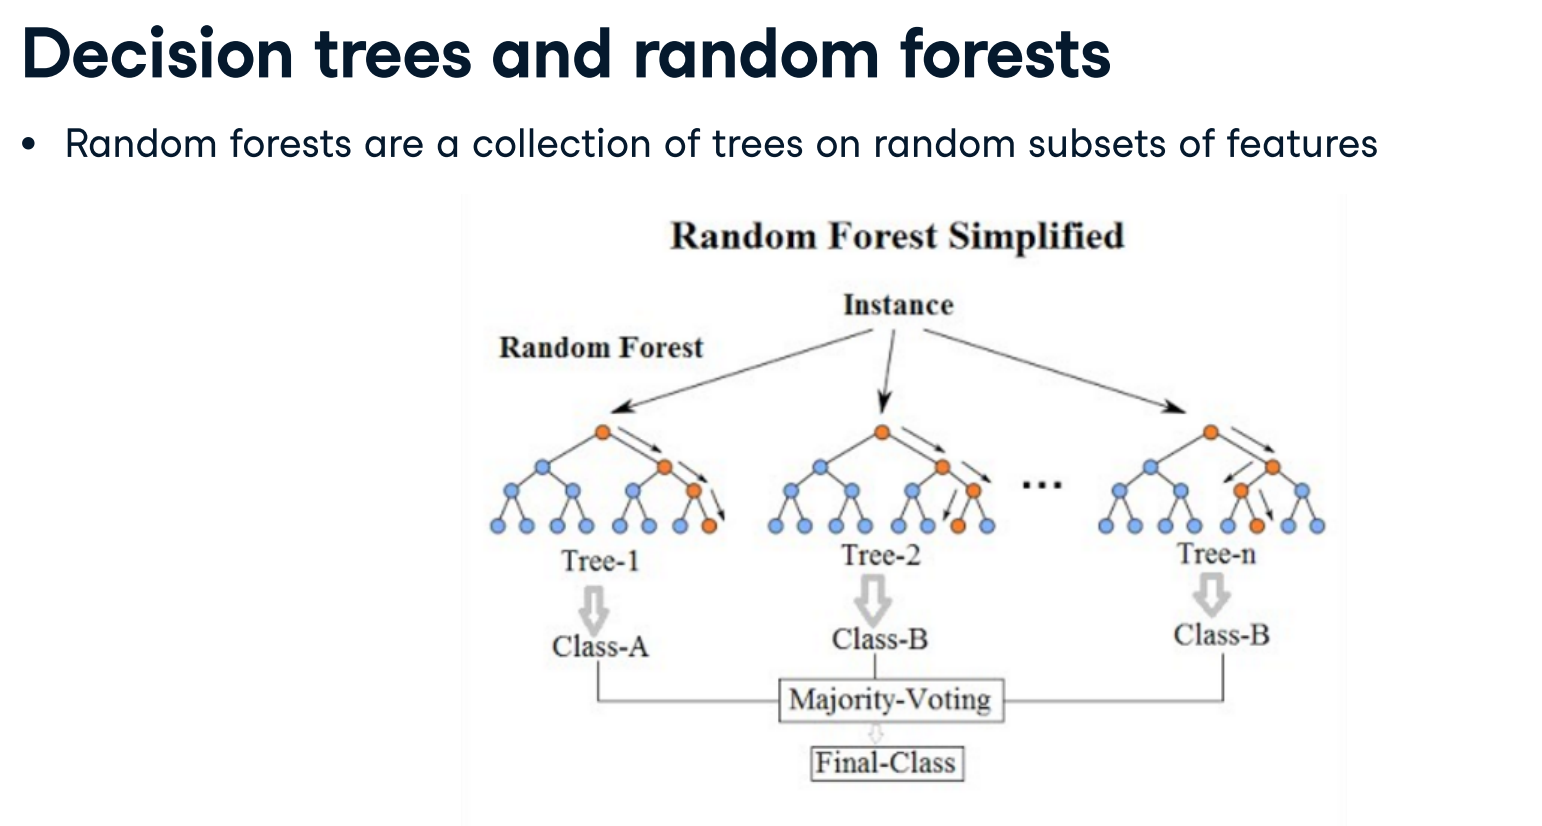

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [18]:
# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [19]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

### Evaluation:
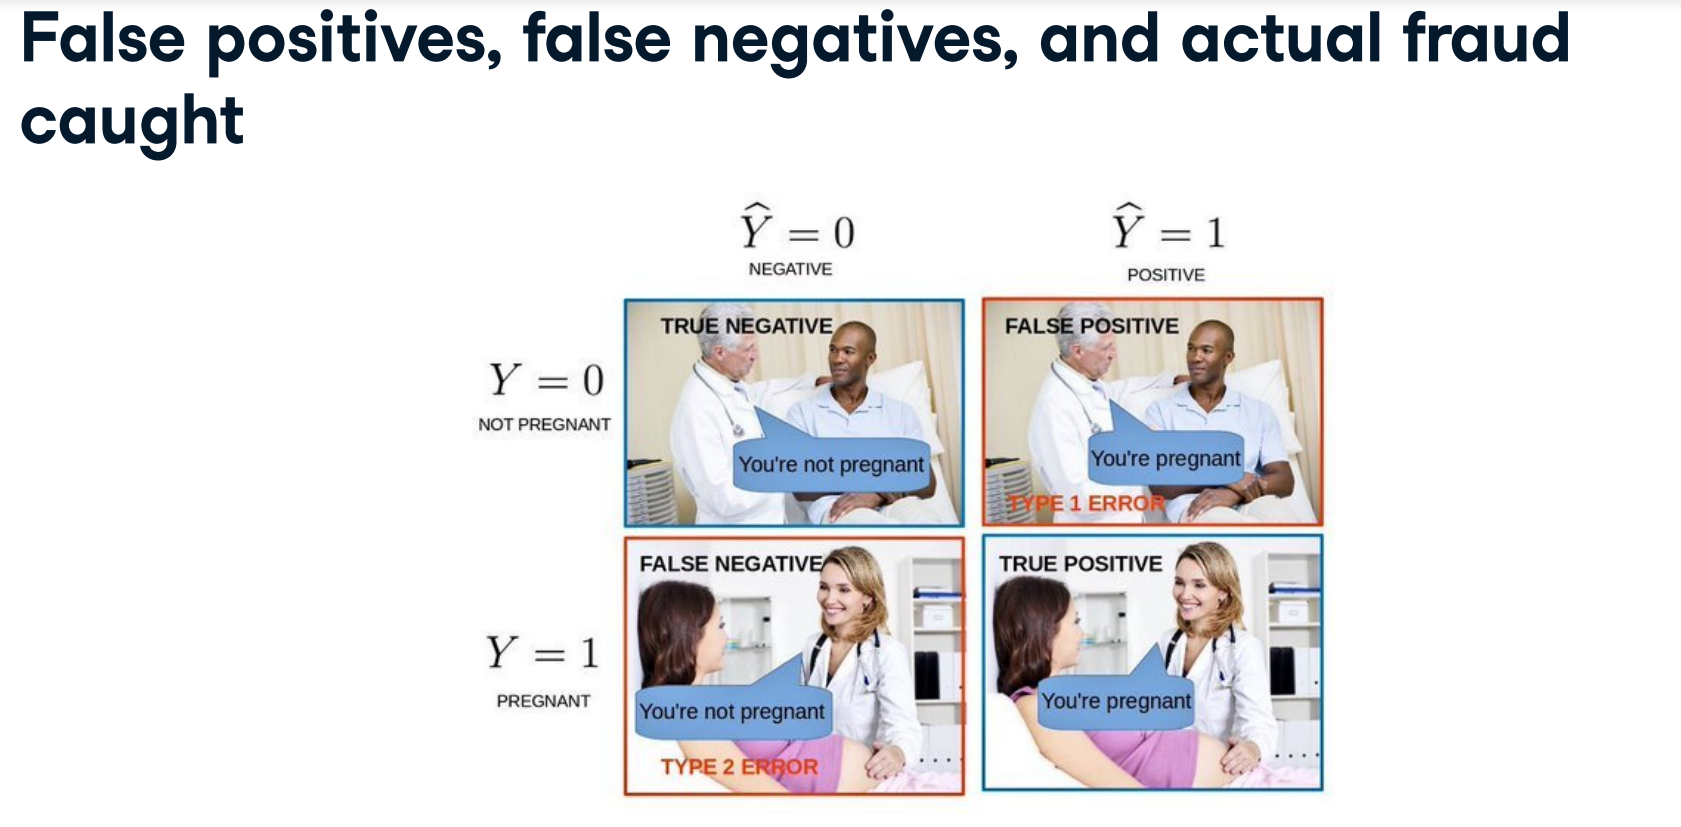

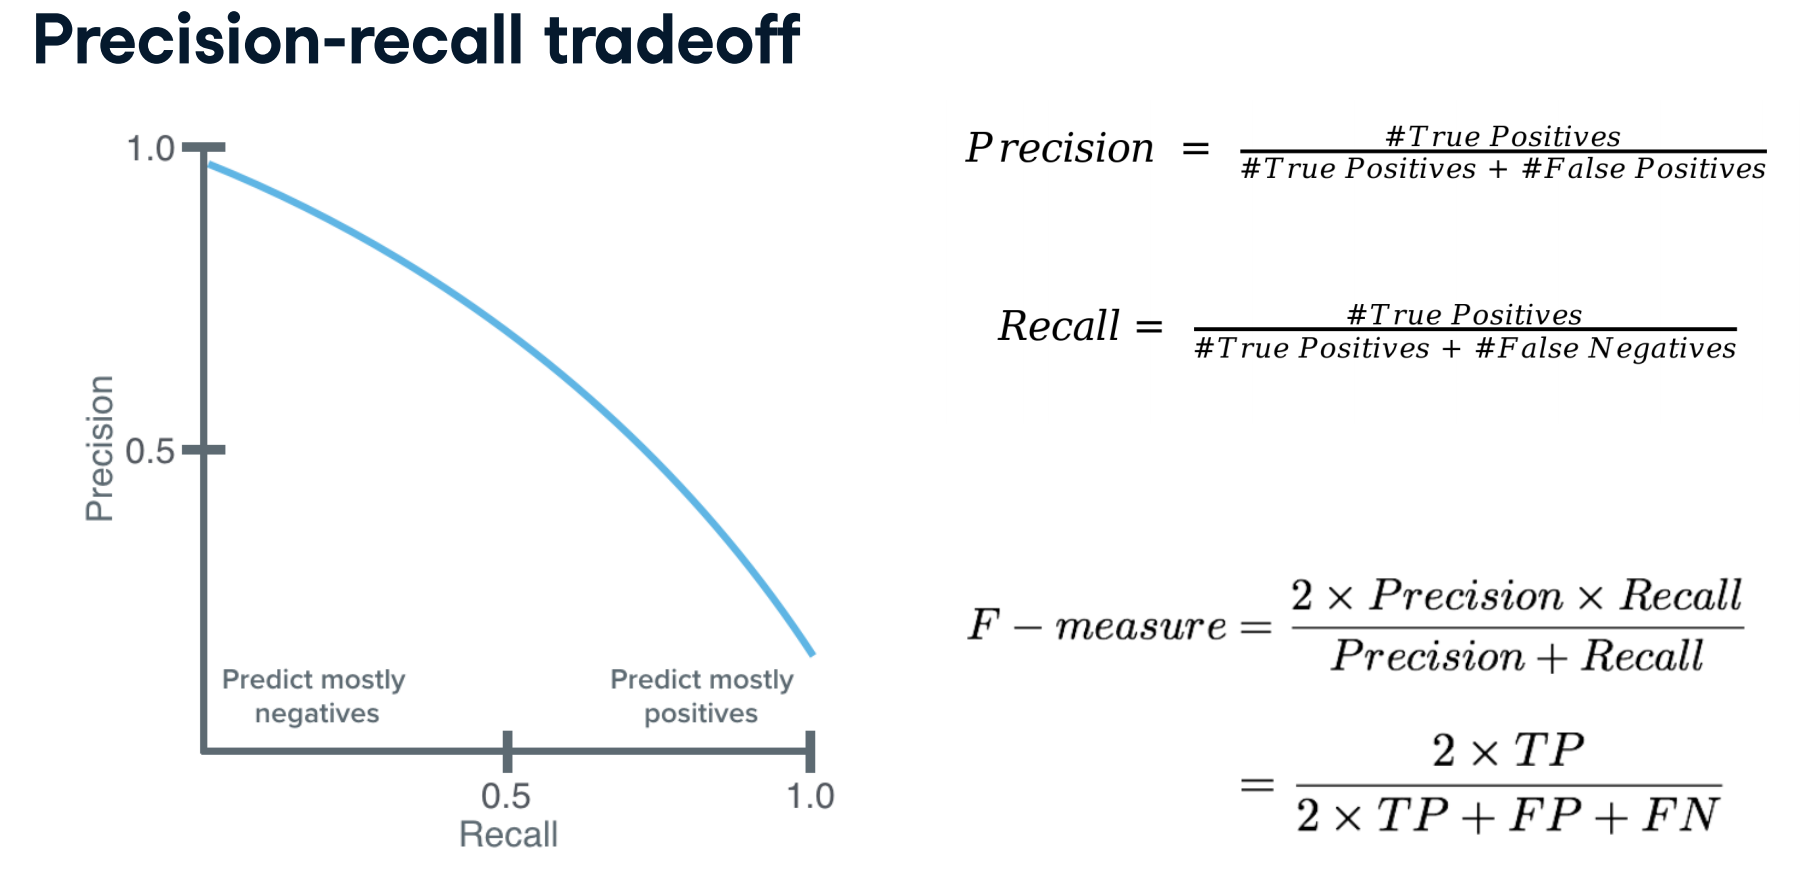

### Precision:
 Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.

### Recall:

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

### F1:
 F1 Score is the weighted average of Precision and Recall.

### Evaluation for Decision Tree:

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.88      0.87      0.88        95

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



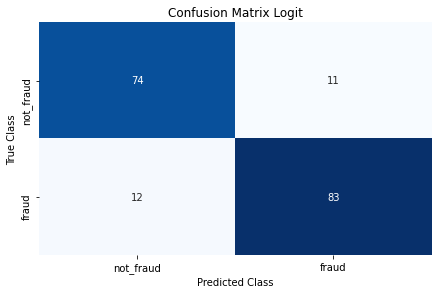

In [21]:
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_logit = pd.DataFrame(matrix, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Evaluation for Random Forest:

In [22]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test,predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        85
           1       0.95      0.85      0.90        95

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.91      0.90      0.90       180



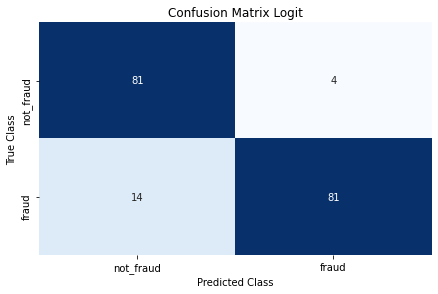

In [23]:
#print CM
matrix_logit = confusion_matrix(y_true=y_test, y_pred=predicted)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Example of prediction:

In [24]:
test = X_test[0]

In [25]:
test

array([-10.30081976,   6.48309459, -15.07636272,   6.55419115,
        -8.88025172,  -4.47167242, -14.9006886 ,   3.84017024,
        -4.35844142, -14.53316169,   7.58874088, -15.83571881,
         0.13503538, -11.56700592,  -0.07702691, -11.46742974,
       -19.17299636,  -6.96985638,   2.21175583,   0.11324436,
         1.50874842,   1.0416421 ,  -0.6827896 ,   0.57354395,
        -1.60238897,  -0.39352082,  -0.46889252,   0.10592016,
         1.        ])

In [26]:
model.predict(test.reshape(1,-1))

array([1], dtype=int64)